# Pymaceuticals Inc.
---

### Analysis

- From the Bar Chart plotted against the Observed Mouse Timepoints and Drug, we can see that Capomulin was the most used Drug, followed by Ramicane. Then rest of the drugs were used almost similar number of times except the Propriva which was used the least times.
- The gender was almost evenly balanced for the test conducted.
- The Boxplot shows that Capomulin and Ramicane were the most effective drugs.
- The Line Plot of tumor vol vs time point indicates that the tumor volume decreased over time when mouse I509 was treated with Capomulin
- There is a positive correlation between mouse weight and the average tumor volume - 0.84. The tumor volume increases with mouse weight.
- 
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
from scipy import stats
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combine_data_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
combine_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
num_of_mices = len(combine_data_df["Mouse ID"].unique())
num_of_mices

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint

combine_data_df_test = combine_data_df

mid_timepoint_group = combine_data_df_test.groupby(['Mouse ID', 'Timepoint']).size()

mid_timepoint_group = mid_timepoint_group.reset_index(name='MID_Timepoint')

duplicate_groups = mid_timepoint_group[mid_timepoint_group ['MID_Timepoint'] > 1]

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_id = duplicate_groups['Mouse ID'].unique()
duplicate_mouse_id

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
# use isin https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isin.html
combine_data_dup_mouse_id = combine_data_df[combine_data_df ['Mouse ID'].isin(duplicate_mouse_id)]
combine_data_dup_mouse_id


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# use isin https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isin.html

combine_data_unique_mouse_id = combine_data_df[~combine_data_df ['Mouse ID'].isin(duplicate_mouse_id)]
combine_data_unique_mouse_id.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
num_of_mices_no_dup = len(combine_data_unique_mouse_id["Mouse ID"].unique())
num_of_mices_no_dup

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

Drug_Regimen_mean = combine_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()

Drug_Regimen_median = combine_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()

Drug_Regimen_var = combine_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()

Drug_Regimen_stdv = combine_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()

# https://www.w3schools.com/python/pandas/ref_df_sem.asp
Drug_Regimen_sem = combine_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

Drug_Regimen_sem

single_summary_DataFrame = pd.DataFrame({'Mean Tumor Volume': Drug_Regimen_mean, 'Median Tumor Volume': Drug_Regimen_median, 'Tumor Volume Variance': Drug_Regimen_var, 'Tumor Volume Std. Dev.': Drug_Regimen_stdv, 'Tumor Volume Std. Err.': Drug_Regimen_sem})

single_summary_DataFrame


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

## https://www.scaler.com/topics/pandas-agg/
## https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.agg.html
summary_statistics = combine_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', sem])

summary_statistics_df = summary_statistics.rename(columns={"mean":"Mean Tumor Volume", "median":"Median Tumor Volume", "var":"Tumor Volume Variance", "std":"Tumor Volume Std. Dev.", "sem":"Tumor Volume Std. Err."})


# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, '# of Observed Mouse Timepoints')

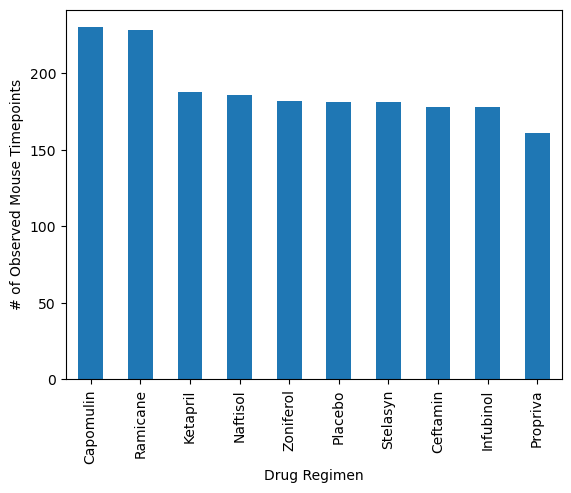

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

drug_regimen_group = combine_data_df.groupby('Drug Regimen')

drug_regimen_count_type = drug_regimen_group['Drug Regimen'].count()

drug_regimen_count_type_desc = drug_regimen_count_type.sort_values(ascending=False)

count_chart = drug_regimen_count_type_desc.plot(kind='bar')

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Drug Regimen")
count_chart.set_ylabel("# of Observed Mouse Timepoints")


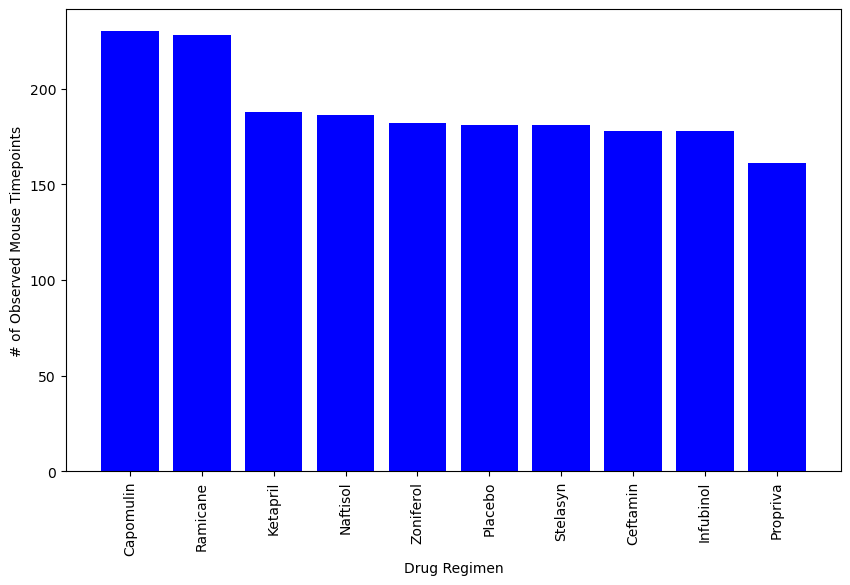

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimen_group = combine_data_df.groupby('Drug Regimen')

drug_regimen_count_type = drug_regimen_group['Drug Regimen'].count()

drug_regimen_count_type_desc = drug_regimen_count_type.sort_values(ascending=False)

# count_chart = drug_regimen_count_type_desc.plot(kind='bar')

drug_regimen_count_type_values = drug_regimen_count_type_desc.values
x_axis = drug_regimen_count_type_desc.index

plt.figure(figsize=(10, 6))
plt.bar(x_axis, drug_regimen_count_type_values, color='blue')

# Set the xlabel and ylabel using class methods
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

# Rotate the x axis values vertically
plt.xticks(rotation='vertical')

plt.show()

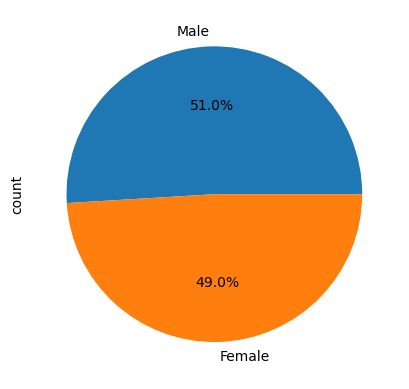

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

## use the df created earlier which has unique mouse details

mice_gender_group_data = combine_data_unique_mouse_id["Sex"].value_counts()
mice_gender_group_data.plot(kind='pie', autopct= "%1.1f%%", startangle=0)

plt.show()

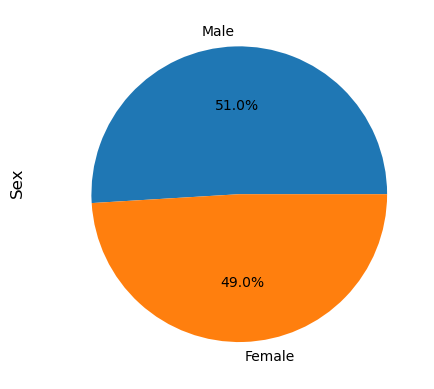

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

## use the df created earlier which has unique mouse details
mice_gender_group_data = combine_data_unique_mouse_id["Sex"].value_counts()
mice_gender_group_data
labels = mice_gender_group_data.index
sizes = mice_gender_group_data.values
plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=0 )
plt.text(-1.5, 0, 'Sex', color='black', fontsize=12, ha='center', rotation='vertical')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# DatFrame that has the last timepoint for each mouse ID is created using groupby
combine_data_mouse_id_df = combine_data_df.groupby(["Mouse ID"]).max()

# The index of the DataFrame is reset
combine_data_mouse_id_df_reset =  combine_data_mouse_id_df.reset_index()

# Retrieve the maximum timepoint for each mouse.
mouse_timeout_max_value = combine_data_mouse_id_df_reset.groupby('Mouse ID')['Timepoint'].max()
mouse_timeout_max_value

# The four treatment groups, Capomulin, Ramicane, Infubinol, and Ceftamin, are put in a list. 

tumor_vol_data_df = pd.merge(combine_data_df, mouse_timeout_max_value, on=("Mouse ID", "Timepoint"), how='right')


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_regimens_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    # add subset 
    
    # Determine outliers using upper and lower bounds

for regimens in treatment_regimens_list:

    get_tumor_vol = tumor_vol_data_df.loc[tumor_vol_data_df["Drug Regimen"]==regimens, "Tumor Volume (mm3)"]
    #tumor_vol = merged_data_lasttp.loc[merged_data_lasttp["Drug Regimen"] == drug, "Tumor Volume (mm3)"]

    # # add subset 
    tumor_vol_data.append(get_tumor_vol)

    tumor_quartiles = get_tumor_vol.quantile([.25,.5,.75])
    lowerq = tumor_quartiles[0.25]
    upperq = tumor_quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    tumor_outliers = get_tumor_vol.loc[(get_tumor_vol > upper_bound) | (get_tumor_vol < lower_bound)]
    print(f"{regimens}'s potential outliers: {tumor_outliers}")

# get_tumor_vol
# tumor_vol_data

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


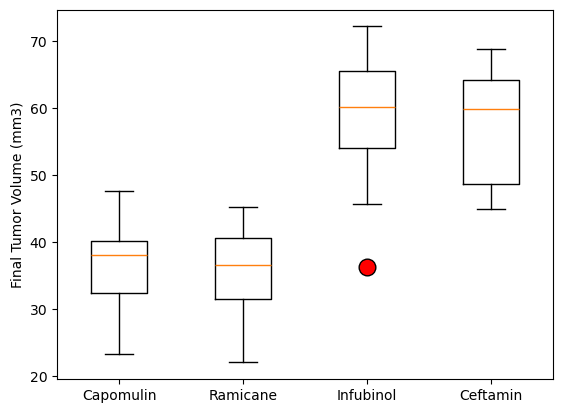

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig1, ax1 = plt.subplots()
# ax1.set_title('Temperatures at LAX')
ax1.set_ylabel('Final Tumor Volume (mm3)')
flierprops_red_dot = dict(markerfacecolor = "red", markersize=12)
ax1.boxplot(tumor_vol_data, labels=treatment_regimens_list, flierprops= flierprops_red_dot)
plt.show()


## Line and Scatter Plots

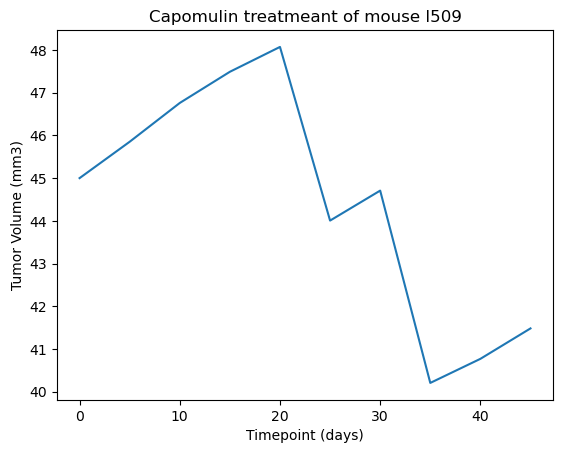

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Drug_Capomulin_df = combine_data_unique_mouse_id.loc[combine_data_unique_mouse_id["Drug Regimen"] == "Capomulin",:]

mouse_line_df = Drug_Capomulin_df.loc[Drug_Capomulin_df["Mouse ID"] == "l509",:]

x_axis = mouse_line_df["Timepoint"]
y_axis = mouse_line_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis, y_axis)

plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

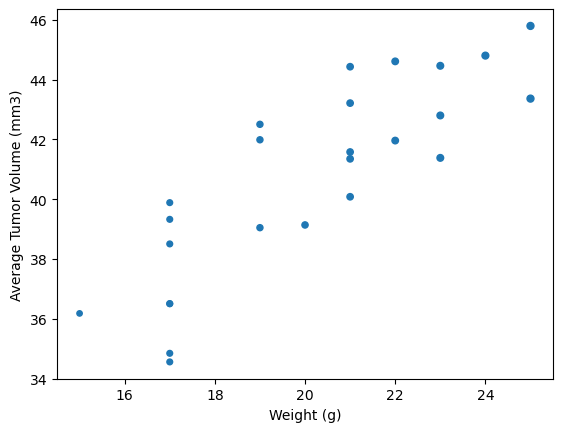

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

avg_obs_tumor_vol = Drug_Capomulin_df["Tumor Volume (mm3)"].groupby(Drug_Capomulin_df["Mouse ID"]).mean()
mouse_weight = Drug_Capomulin_df["Weight (g)"].groupby(Drug_Capomulin_df["Mouse ID"]).mean()

plt.scatter(mouse_weight, avg_obs_tumor_vol, s=mouse_weight)

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


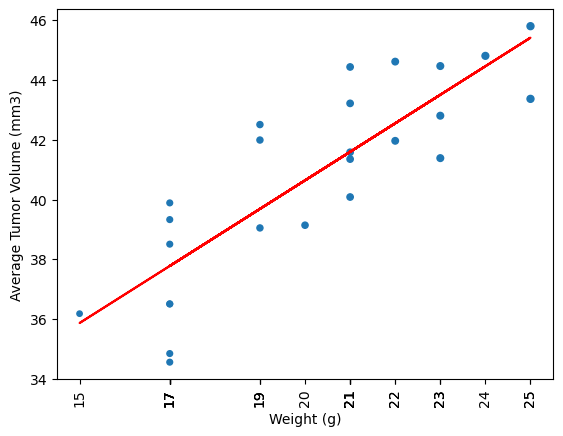

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

print(f"The correlation between mouse weight and the average tumor volume is {round(st.pearsonr(mouse_weight,avg_obs_tumor_vol)[0],2)}")


# x_values = san_diego_housing['AveRooms']
# y_values = san_diego_housing['MEDV']
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.scatter(x_values,y_values)
# plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
# plt.xlabel('Rooms in House')
# plt.ylabel('Median House Prices ($100,000)')
# plt.show()

# pe_slope, pe_int, pe_r, pe_p, pe_std_err = stats.linregress(mouse_weight, avg_obs_tumor_vol)

# slope, intercept, r, p, se = stats.linregress(mouse_weight, avg_obs_tumor_vol)

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(mouse_weight, avg_obs_tumor_vol)

avg_obs_tumor_vol_y = slope * mouse_weight + intercept

plt.scatter(mouse_weight, avg_obs_tumor_vol, s=mouse_weight)

plt.plot(mouse_weight,avg_obs_tumor_vol_y,"r-")
plt.xticks(mouse_weight, rotation=90)

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()